# Randomized optimization techniques
In this notebook, we discuss some randomized optimization techniques which help us to search through a large parameter or hypothesis space for a machine learning task.

In [280]:
import numpy as np
import matplotlib.pyplot as plt

## Random hill climbing

Hill Climbing is heuristic search used for **mathematical optimization problems** in the field of Artificial Intelligence.

Given a large set of inputs and a good **heuristic function**, it tries to find a sufficiently good solution to the problem. This solution may not be the **global optimal maximum**.


* In the above definition, **mathematical optimization** problems implies that hill climbing solves the problems where we need to maximize or minimize a given real function by choosing values from the given inputs. Example-Travelling salesman problem where we need to minimize the distance traveled by salesman.
* **Heuristic search** means that this search algorithm may not find the optimal solution to the problem. However, it will give a good solution in reasonable time.
* A heuristic function is a function that will rank all the possible alternatives at any branching step in search algorithm based on the available information. It helps the algorithm to select the best route out of possible routes.

<br>

![Random hill climbing](https://i.stack.imgur.com/HISbC.png)

### Define a non-convex function, a pretty plotting function, and generate an array (of say 1000 points)

In [2]:
lst=[i for i in range(1000)]

In [1]:
def plot_fitness(array):
    plt.figure(figsize=(15,5))
    plt.grid(True)
    plt.title("Fitness function",fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.plot(array,lw=3,c='blue')

In [283]:
def func1(x):
    import numpy as np
    result = (x%271)*np.sin(x/37)*np.exp(-0.001*x)
    return result

In [284]:
f=np.array(list(map(func1,lst)))

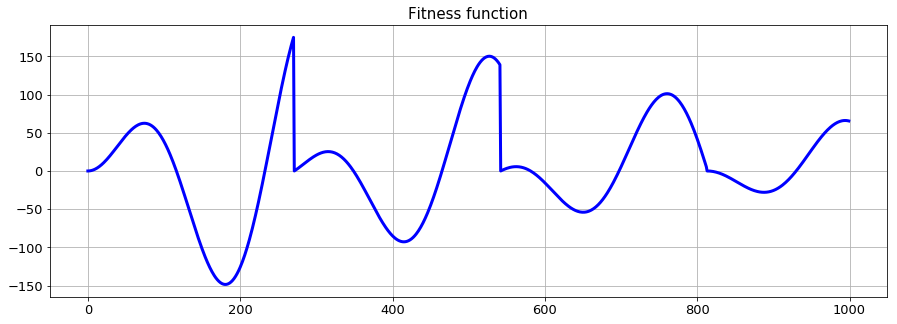

In [285]:
plot_fitness(f)

### Simple hill climbing function (search local maxima)

In [286]:
def simple_climb(goal_state,init_state,fitness_func,error_margin=1,step_size=1,verbosity=1):
    """
    """
    current_state=init_state
    current_eval=fitness_func(current_state)
    
    if verbosity:
        print("Starting from initial state of ", current_state)
    while np.abs(current_eval-goal_state)> error_margin:
        nextEval=-100
        next_state=0
        for i in (current_state-step_size,current_state+step_size+1):
            if fitness_func(i)>nextEval:
                next_state=i
                nextEval=fitness_func(i)
        if nextEval < fitness_func(current_state):
            if verbosity:
                print("Returning from a peak (local or global)")
            return(current_state,fitness_func(current_state))
        if (next_state>current_state):
            if verbosity:
                print("Climbing right")
        else:
            if verbosity:
                print("Climbing left")
        current_state=next_state
        #print("New state: ",current_state)

In [540]:
init_candidate = np.random.randint(0,999)
simple_climb(goal_state=f.max(),init_state=init_candidate,fitness_func=func1,step_size=1,error_margin=0.5)

Starting from initial state of  731
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing right
Climbing left
Returning from a peak (local or global)


(760, 101.21581243525819)

### Function to search for global maxima with _random restarts_

In [499]:
def search_global_maxima(target,max_restarts=10,verbosity=1,algorithm='hill_climb'):
    if verbosity:
        print("Seaching for global maxima", target)
        print("===========================================")
    if algorithm=='hill_climb':
        for i in range(max_restarts):
            init_candidate = np.random.randint(0,999)
            x=simple_climb(goal_state=target,init_state=init_candidate,
                                  fitness_func=func1,step_size=1,error_margin=0.5,verbosity=0)
            if x!=None:
                peak=x[0]
                val=x[1]
            else:
                peak=0
                val=0
            if val==target:
                if verbosity:
                    print(f"Found global maxima in attempt #{i+1}!")
                return (peak,val,i+1)
            else:
                if verbosity:
                    print(f"Local maxima {val} found at {peak}.")
        if verbosity:
            print("Sorry could not find global maxima!")
        return None
    
    if algorithm=='simulated_annealing':
        for i in range(max_restarts):
            init_candidate = np.random.randint(0,999)
            x=simulated_annealing(init_state=init_candidate,fitness_func=func1,neighbourhood_size=15,
                            init_temp=20,num_iterations=1000,verbosity=0)
            if x!=None:
                peak=x[0]
                val=x[1]
            else:
                peak=0
                val=0
            if val==target:
                if verbosity:
                    print(f"Found global maxima in attempt #{i+1}!")
                return (peak,val,i+1)
            else:
                if verbosity:
                    print(f"Local maxima {val} found at {peak}.")
        if verbosity:
            print("Sorry could not find global maxima!")
        return None

### Test the `search_global_maxima` function with `hill_climb` as `algorithm` by providing the true maximum value as target

In [500]:
# Get the maximum of the array as the target
target=f.max()
# Run gloab search
search_global_maxima(target,max_restarts=100,algorithm='hill_climb')

Seaching for global maxima 174.99188994867163
Local maxima 62.488469836604 found at 74.
Local maxima 62.488469836604 found at 74.
Local maxima 62.488469836604 found at 74.
Local maxima 62.488469836604 found at 74.
Local maxima 62.488469836604 found at 74.
Local maxima 101.21581243525819 found at 760.
Local maxima 66.11706862276608 found at 994.
Local maxima 25.376425214353514 found at 315.
Found global maxima in attempt #9!


(270, 174.99188994867163, 9)

### Run the `search_global_maxima` function for a sufficiently large number of times, extract how many random restarts are required for each case, and plot their distribution

0-th run completed.
100-th run completed.
200-th run completed.
300-th run completed.
400-th run completed.
500-th run completed.
600-th run completed.
700-th run completed.
800-th run completed.
900-th run completed.


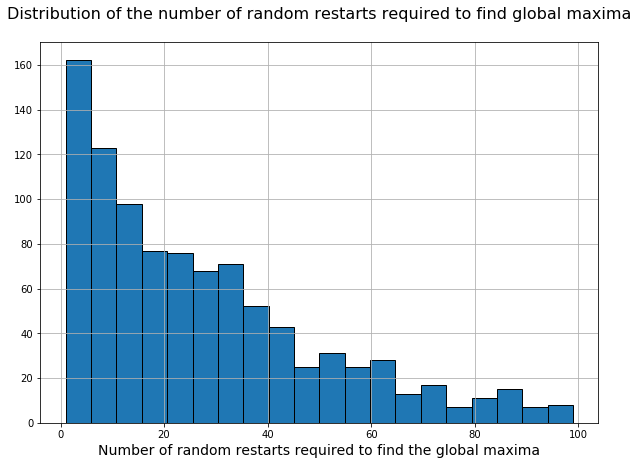

In [297]:
target=f.max()
attempts=[]
for i in range(1000):
    x = search_global_maxima(target,max_restarts=100,verbosity=0)
    if type(x)==tuple:
        attempts.append(x[2])
    if i%100==0:
        print(f"{i}-th run completed.")

plt.figure(figsize=(10,7))
plt.title("Distribution of the number of random restarts required to find global maxima (hill climbing)\n",
          fontsize=16)
plt.grid(True)
plt.hist(attempts,bins=20,edgecolor='k',fill='blue')
plt.xlabel("Number of random restarts required to find the global maxima",fontsize=14)
plt.show()

## Simulated annealing

Simulated annealing (SA) is a **probabilistic technique** for approximating the global optimum of a given function. Specifically, it is a **metaheuristic to approximate global optimization in a large search space**. It is often used when the search space is discrete (e.g., all tours that visit a given set of cities). 

For problems where finding an approximate global optimum is more important than finding a precise local optimum in a fixed amount of time, simulated annealing may be preferable to alternatives such as gradient descent.

The name and inspiration come from annealing in **metallurgy**, a technique involving heating and controlled cooling of a material to increase the size of its crystals and reduce their defects. Both are attributes of the material that depend on its **thermodynamic free energy**. Heating and cooling the material affects both the temperature and the thermodynamic free energy. 

> ***The simulation of annealing can be used to find an approximation of a global minimum for a function with a large number of variables to the statistical mechanics of equilibration (annealing) of the mathematically equivalent artificial multiatomic system.***

This notion of slow cooling implemented in the simulated annealing algorithm is interpreted as a slow decrease in the probability of accepting worse solutions as the solution space is explored. **Accepting worse solutions is a fundamental property of metaheuristics because it allows for a more extensive search** for the global optimal solution. 

In general, the simulated annealing algorithms work as follows. At each time step, the algorithm randomly selects a solution close to the current one, measures its quality, and then decides to move to it or to stay with the current solution based on either one of two probabilities between which it chooses on the basis of the fact that the new solution is better or worse than the current one. During the search, the temperature is progressively decreased from an initial positive value to zero and affects the two probabilities: at each step, the probability of moving to a better new solution is either kept to 1 or is changed towards a positive value; instead, the probability of moving to a worse new solution is progressively changed towards zero. 

<br>

![Simulated annealing](https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif)

### Probability function of simulated annealing

In [326]:
def prob_annealing(x,xt,temp,func):
    """
    Returns the probability of 'jump' for simulated annealing
    """
    if func(xt) >= func(x):
        prob = 1.0
    else:
        prob = np.exp((func(xt)-func(x))/temp)
    
    return prob

### Simulated annealing function

In [521]:
def simulated_annealing(init_state,fitness_func,init_temp=10, temp_decay=0.99,
                        neighbourhood_size=10,num_iterations=20,verbosity=0, detail_output=False):
    """
    Simulated annealing
    """
    temp_array=[init_temp]
    state_array=[init_state]
    
    current_state=int(init_state)
    current_eval=fitness_func(current_state)
    temp=init_temp
    temp_decay=(1/num_iterations)
    
    if verbosity:
        print("Starting from initial state of ", current_state)
    for i in range(num_iterations):
        if verbosity:
            print("Current temperature: ",temp)
        
        neighbourhood = np.arange(current_state-neighbourhood_size,current_state+neighbourhood_size+1)
        next_state=int(np.random.choice(neighbourhood,size=1))
        nextEval=fitness_func(next_state)
        
        p = prob_annealing(current_state,next_state,temp=temp,func=fitness_func)
        
        if p==1.0:
            current_state=next_state
            state_array.append(next_state)
            if verbosity:
                print(f"Iteration: {i}. Jumped to {next_state} because fitness is higher")
        else:
            jump=np.random.binomial(1,p=p)
            if jump:
                current_state=next_state
                state_array.append(next_state)
                if verbosity:
                    print(f"Iteration: {i}. Jumped to {next_state} with probability {p}")
            else:
                current_state=current_state
                state_array.append(current_state)
                if verbosity:
                    print(f"Iteration: {i}. Did not jump with probability {p}")
        
        temp=temp*(1-temp_decay)
        temp_array.append(temp)
        current_eval=fitness_func(current_state)
    
    if detail_output:
        temp_array=np.array(temp_array)
        state_array=np.array(state_array)
        val_array=np.array(list(map(fitness_func,state_array)))
        return (current_state,current_eval,temp_array,state_array,val_array)
    else:
        return (current_state,current_eval)

### Helper function to plot the temperature, state value, and states traversed during the simulated annealing process

In [524]:
def plot_simulated_annealing(simulated_annealing):
    
    init_candidate = np.random.randint(0,800)
    # Unpack the tuple
    # a - final state
    # b - final value
    # c- array of temperatures
    # d- array of states
    # e - value array
    
    a,b,c,d,e=(simulated_annealing)
    
    plt.figure(figsize=(10,6))
    plt.plot(e,lw=3,c='red')
    plt.title("Fitness function value", fontsize=16)
    plt.grid(True)
    plt.xlabel("Iterations of the simulated annealing process", fontsize=14)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.plot(np.array(d),lw=3,c='blue')
    plt.title("Index of the array",fontsize=16)
    plt.grid(True)
    plt.xlabel("Iterations of the simulated annealing process", fontsize=14)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.plot(np.array(c),lw=3,c='green')
    plt.title("Temperature of the simulated annealing",fontsize=16)
    plt.grid(True)
    plt.xlabel("Iterations of the simulated annealing process", fontsize=14)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

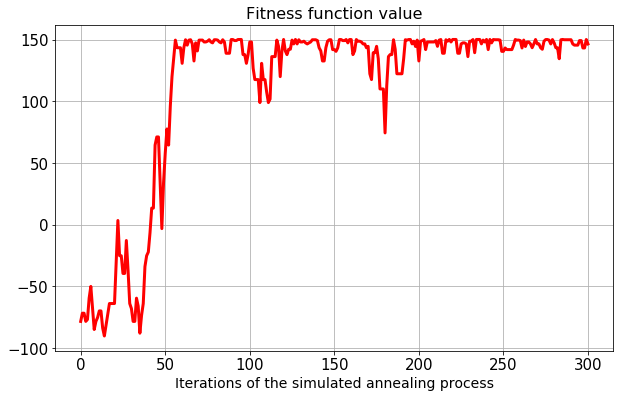

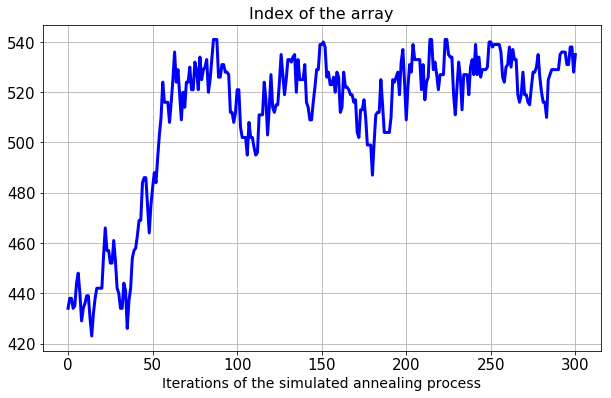

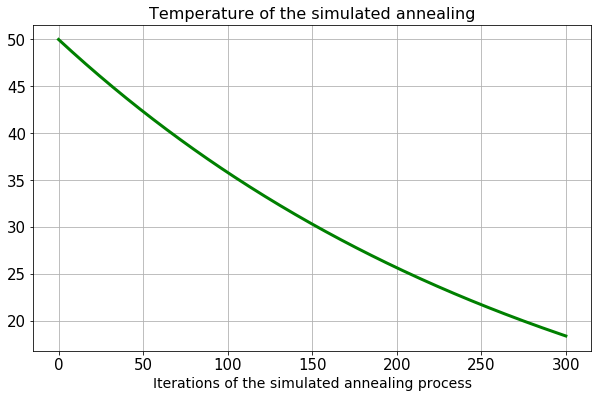

In [539]:
# Drawn a random sample as initial candidate state 
init_candidate = np.random.randint(0,999)
# Create a simulated_annealing object with detail_output option set to True, which returns a 5-element tuple
# Play with various parameters like neighbourhood_size, init_temp, and num_iterations to see the impact
sa = simulated_annealing(init_state=init_candidate,fitness_func=func1,neighbourhood_size=15,
                            init_temp=50,num_iterations=300,verbosity=0,detail_output=True)
plot_simulated_annealing(sa)

### Try the `search_global_maxima` function with `simulated_annealing` as the `algorithm`

In [502]:
# Get the maximum of the array as the target
target=f.max()
# Run global search
search_global_maxima(target,max_restarts=100,algorithm='simulated_annealing')

Seaching for global maxima 174.99188994867163
Local maxima 156.56597614363028 found at 265.
Local maxima 100.10107820012153 found at 755.
Local maxima 101.12626739598001 found at 762.
Local maxima 149.7664492431072 found at 524.
Local maxima 58.63957059193701 found at 63.
Local maxima 128.93707177300175 found at 507.
Local maxima 164.24861860551042 found at 267.
Local maxima 61.27795234301961 found at 68.
Local maxima 66.09956190362531 found at 995.
Local maxima 148.86363295444085 found at 522.
Local maxima 62.371881645279124 found at 76.
Local maxima 147.5246140397561 found at 520.
Local maxima 91.66643667700671 found at 776.
Local maxima 66.09956190362531 found at 995.
Local maxima 65.99777048302927 found at 992.
Local maxima 152.57897005064632 found at 264.
Local maxima 171.51942780254154 found at 269.
Local maxima 98.33712343811 found at 769.
Local maxima 117.75209302532008 found at 502.
Local maxima 64.01616359971126 found at 985.
Local maxima 167.93722048539374 found at 268.
Loca

(270, 174.99188994867163, 23)

### Run the `search_global_maxima` function for a sufficiently large number of times, extract how many random restarts are required for each case, and plot their distribution

0-th run completed.
10-th run completed.
20-th run completed.
30-th run completed.
40-th run completed.
50-th run completed.
60-th run completed.
70-th run completed.
80-th run completed.
90-th run completed.
100-th run completed.
110-th run completed.
120-th run completed.
130-th run completed.
140-th run completed.
150-th run completed.
160-th run completed.
170-th run completed.
180-th run completed.
190-th run completed.


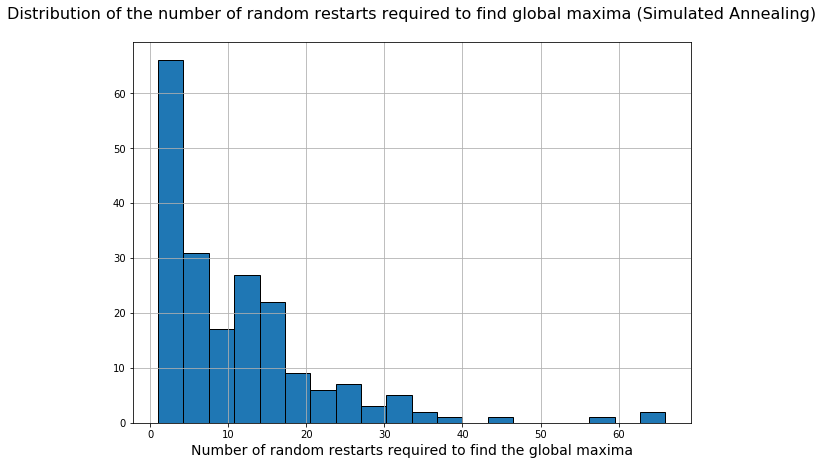

In [504]:
target=f.max()
attempts=[]
for i in range(200):
    x = search_global_maxima(target,max_restarts=100,verbosity=0,algorithm='simulated_annealing')
    if type(x)==tuple:
        attempts.append(x[2])
    if i%10==0:
        print(f"{i}-th run completed.")

plt.figure(figsize=(10,7))
plt.title("Distribution of the number of random restarts required to find global maxima (Simulated Annealing)\n",
          fontsize=16)
plt.grid(True)
plt.hist(attempts,bins=20,edgecolor='k',fill='blue')
plt.xlabel("Number of random restarts required to find the global maxima",fontsize=14)
plt.show()